import theano

In [2]:
import theano.tensor as T

In [16]:
x = T.scalar()

In [4]:
x

<TensorType(float32, scalar)>

In [66]:
y = 3*(x**2) + 1

In [6]:
type(y)

theano.tensor.var.TensorVariable

In [7]:
print(y)

Elemwise{add,no_inplace}.0


In [67]:
theano.pprint(y)

'((TensorConstant{3} * (<TensorType(float32, scalar)> ** TensorConstant{2})) + TensorConstant{1})'

In [68]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [@A] ''   
 |Elemwise{mul,no_inplace} [@B] ''   
 | |TensorConstant{3} [@C]
 | |Elemwise{pow,no_inplace} [@D] ''   
 |   |<TensorType(float32, scalar)> [@E]
 |   |TensorConstant{2} [@F]
 |TensorConstant{1} [@G]


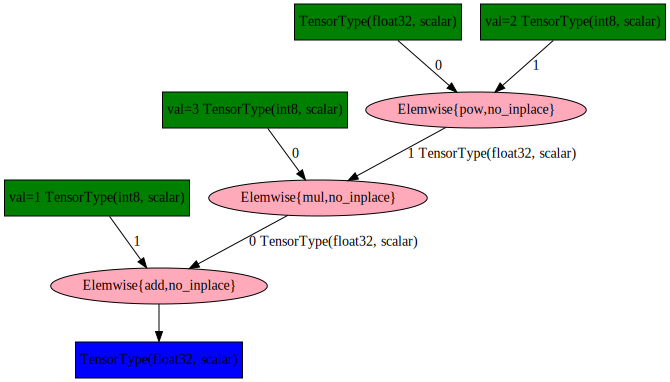

In [9]:
from IPython.display import SVG
SVG(theano.printing.pydotprint(y, return_image=True, format='svg'))

Supply a `dict` mapping variables to values

In [10]:
y.eval({x: 2})

array(13.0, dtype=float32)

Compile a function

In [11]:
f = theano.function([x], y)

In [12]:
f(2)

array(13.0, dtype=float32)

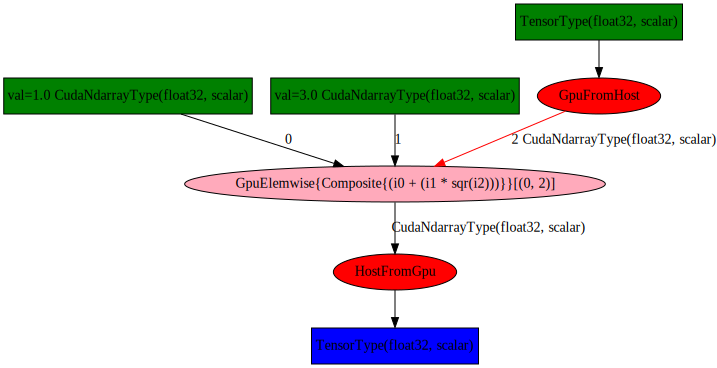

In [69]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

In [19]:
X = T.vector()
X = T.matrix()
X = T.tensor3()
X = T.tensor4()

In [20]:
X = T.vector()

In [25]:
X[1:-1:2]

Subtensor{int64:int64:int64}.0

In [24]:
X[[1,2,3]]

AdvancedSubtensor1.0

Many functions/operations available through `theano.tensor` or variable methods

In [74]:
y = X.argmax()

In [76]:
y = T.cosh(X)

In [78]:
y = T.outer(X, X)

Don't try to use numpy functions on Theano variables!

# Gradient

In [310]:
x = T.scalar()
y = T.log(x)


In [319]:
gradient = T.grad(y, x)
gradient.eval({x: 2})

array(0.5, dtype=float32)

In [312]:
f = theano.function([x], gradient)

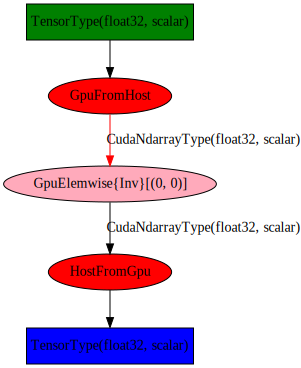

In [316]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

array(0.5, dtype=float32)

# Shared Variables

- Symbolic + Storage

In [111]:
import numpy as np
x = theano.shared(np.zeros((2, 3), dtype=theano.config.floatX))

In [112]:
x

<CudaNdarrayType(float32, matrix)>

In [113]:
values = x.get_value()
print(values.shape)
print(values)

(2, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [117]:
x.set_value(values)

In [118]:
(x + 2) ** 2

Elemwise{pow,no_inplace}.0

In [120]:
((x + 2) ** 2).eval()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

In [122]:
theano.function([], (x + 2) ** 2)()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

# Updates

- Store results of function evalution
- `dict` mapping shared variables to new values

In [138]:
count = theano.shared(0)
new_count = count + 1
updates = {count: new_count}

f = theano.function([], count, updates=updates)

In [139]:
f()

array(0)

In [140]:
f()

array(1)

In [141]:
f()

array(2)

In [144]:
board = theano.shared(np.zeros((100, 100), dtype='uint8'))

In [194]:
neighbors = []
neighbors.append(T.roll(board, 1, 0))
neighbors.append(T.roll(board, 1, 1))
neighbors.append(T.roll(board, -1, 0))
neighbors.append(T.roll(board, -1, 1))
neighbors.append(T.roll(T.roll(board, 1, 1), 1, 0))
neighbors.append(T.roll(T.roll(board, 1, 1), -1, 0))
neighbors.append(T.roll(T.roll(board, -1, 1), -1, 0))
neighbors.append(T.roll(T.roll(board, -1, 1), 1, 0))
alive_neighbors = sum(neighbors)

In [195]:
born = T.eq(board, 0) * T.eq(alive_neighbors, 3)

In [196]:
survived = T.eq(board, 1) * (T.eq(alive_neighbors, 2) + T.eq(alive_neighbors, 3))

In [198]:
new_board = T.cast(survived + born, 'uint8')

In [199]:
updates = {board: new_board}

In [200]:
f = theano.function([], board, updates=updates)

In [202]:
%timeit f()

10000 loops, best of 3: 73.4 µs per loop


In [203]:
initial = np.random.binomial?

In [266]:
initial = np.random.binomial(1, 0.1, size=(100, 100)).astype('uint8')
board.set_value(initial)

In [269]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


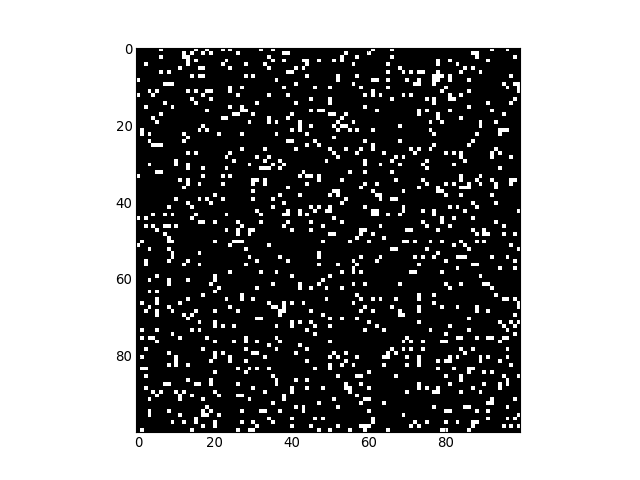

In [270]:
plt.imshow(initial, interpolation='nearest', cmap='gray')

In [320]:
from IPython import display
import time

for i in range(50):
    plt.gca().cla()
    current = f()
    plt.imshow(current, interpolation='nearest', cmap='gray')
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(0.1) 

TypeError: Missing required input: <TensorType(float32, scalar)>

In [277]:
np.roll?

In [279]:
board = np.zeros((100, 100))

neighbors = []
neighbors.append(np.roll(board, 0, -1))
neighbors.append(np.roll(board, 0, 1))
neighbors.append(np.roll(board, 1, -1))
neighbors.append(np.roll(board, 1, 1))
neighbors.append(np.roll(np.roll(board, 0, -1), 1, -1))
neighbors.append(np.roll(np.roll(board, 0, 1), 1, 1))
neighbors.append(np.roll(np.roll(board, 0, -1), 1, 1))
neighbors.append(np.roll(np.roll(board, 0, 1), 1, -1))
                 
alive_neighbors = sum(neighbors)

In [282]:
born = (board == 0) * (alive_neighbors == 3)
survived = (board == 1) * ((alive_neighbors == 2) + (alive_neighbors == 3))

In [283]:
new_board = born + survived

In [287]:
def update(board):
    neighbors = []
    neighbors.append(np.roll(board, 0, -1))
    neighbors.append(np.roll(board, 0, 1))
    neighbors.append(np.roll(board, 1, -1))
    neighbors.append(np.roll(board, 1, 1))
    neighbors.append(np.roll(np.roll(board, 0, -1), 1, -1))
    neighbors.append(np.roll(np.roll(board, 0, 1), 1, 1))
    neighbors.append(np.roll(np.roll(board, 0, -1), 1, 1))
    neighbors.append(np.roll(np.roll(board, 0, 1), 1, -1))

    alive_neighbors = sum(neighbors)

    born = 1 * (board == 0) * (alive_neighbors == 3)
    survived = 1 * (board == 1) * ((alive_neighbors == 2) + (alive_neighbors == 3))

    new_board = born + survived
    
    return new_board

In [289]:
%timeit update(initial)

1000 loops, best of 3: 424 µs per loop
